Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Best parameters from GridSearch: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-val score: 0.9736


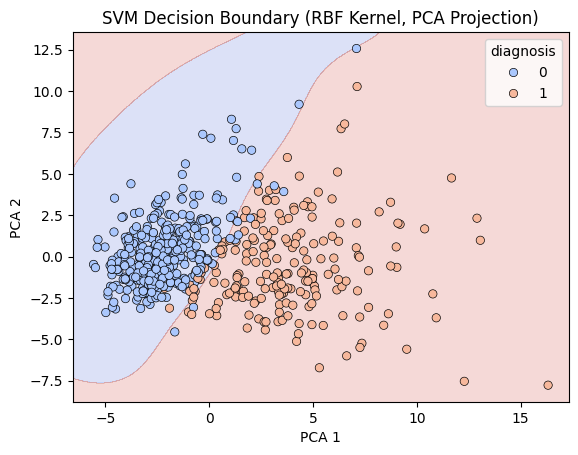

Cross-validation accuracy (mean ± std): 0.9736 ± 0.0147


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv("breast-cancer.csv")
df.drop(columns=["id"], inplace=True)  # Drop ID column

# Encoding target label (M=1, B=0)
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Trainng Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

# Training SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# 4. Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f"Best parameters from GridSearch: {grid.best_params_}")
print(f"Best cross-val score: {grid.best_score_:.4f}")

# 5. Visualize decision boundaries using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis.fit(X_pca, y)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title("SVM Decision Boundary (RBF Kernel, PCA Projection)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_decision_boundary(X_pca, y, svm_vis)

# Cross-validation evaluation
scores = cross_val_score(SVC(kernel='rbf', C=1.0, gamma='scale'), X_scaled, y, cv=5)
print(f"Cross-validation accuracy (mean ± std): {scores.mean():.4f} ± {scores.std():.4f}")
